In [20]:
import pandas as pd
import numpy as np # operaciones matematicas
import matplotlib.pyplot as plt # graficar

import seaborn as sns # graficar

from sklearn.model_selection import train_test_split # dividir datos
from sklearn.tree import DecisionTreeClassifier # modelo
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import mean_squared_error # criterio de evaluacion
from sklearn.metrics import classification_report, accuracy_score

from sklearn import tree # modelo
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

In [21]:
df = pd.read_csv("dataset.csv")

In [22]:
df.head()

,number_of_syllables,number_of_pauses,speech_rate,articulation_rate,speaking_duration,total_duration,ratio,wer,label
0,0.9,0.3,0.9,0.5,0.6,0.2,0.2,0.6,1
1,1.0,0.6,0.4,0.6,0.6,0.1,0.5,0.3,1
2,0.4,0.2,0.6,0.3,0.2,0.2,0.8,0.2,1
3,0.4,0.6,0.7,0.2,0.6,0.6,0.5,0.5,1
4,0.9,0.4,0.4,0.3,0.3,0.9,0.7,0.5,1


In [23]:
df.columns

Index(['number_of_syllables', 'number_of_pauses', 'speech_rate',
       'articulation_rate', 'speaking_duration', 'total_duration', 'ratio',
       'wer', 'label'],
      dtype='object')

In [24]:
# features
X = df.drop(columns=["label"])

In [25]:
X.head()

,number_of_syllables,number_of_pauses,speech_rate,articulation_rate,speaking_duration,total_duration,ratio,wer
0,0.9,0.3,0.9,0.5,0.6,0.2,0.2,0.6
1,1.0,0.6,0.4,0.6,0.6,0.1,0.5,0.3
2,0.4,0.2,0.6,0.3,0.2,0.2,0.8,0.2
3,0.4,0.6,0.7,0.2,0.6,0.6,0.5,0.5
4,0.9,0.4,0.4,0.3,0.3,0.9,0.7,0.5


In [26]:
# class
y = df["label"]

In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42
)

In [886]:
# 3. Train decision tree
clf = DecisionTreeClassifier(
        criterion="gini",  # or "gini"
        max_depth=2,          # prevent overfitting
    )

In [887]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [888]:
# 4. Evaluate
y_pred = clf.predict(X_test)

In [889]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7166666666666667


In [890]:
arr = [0.0, 0.0, 0.6, 0.2, 0.3, 1.0, 0.4, 0.3]
arr_np = np.array(arr).reshape(1,8)
print(arr_np)


[[0.  0.  0.6 0.2 0.3 1.  0.4 0.3]]


In [891]:
label_map = {0: "Beginner", 1: "Intermediate", 2: "Advanced"}
pred = clf.predict(arr_np)
print(label_map[pred[-1]])

Intermediate


/Users/valeriagonzalez/Documents/classifier/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [892]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73        60
           1       0.60      0.45      0.51        60
           2       0.90      0.87      0.88        60

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.71       180
weighted avg       0.72      0.72      0.71       180



In [893]:
# 5. Show rules (text)
print(export_text(clf, feature_names=list(X.columns)))

|--- wer <= 0.25
|   |--- speech_rate <= 0.45
|   |   |--- class: 2
|   |--- speech_rate >  0.45
|   |   |--- class: 1
|--- wer >  0.25
|   |--- articulation_rate <= 0.35
|   |   |--- class: 1
|   |--- articulation_rate >  0.35
|   |   |--- class: 0



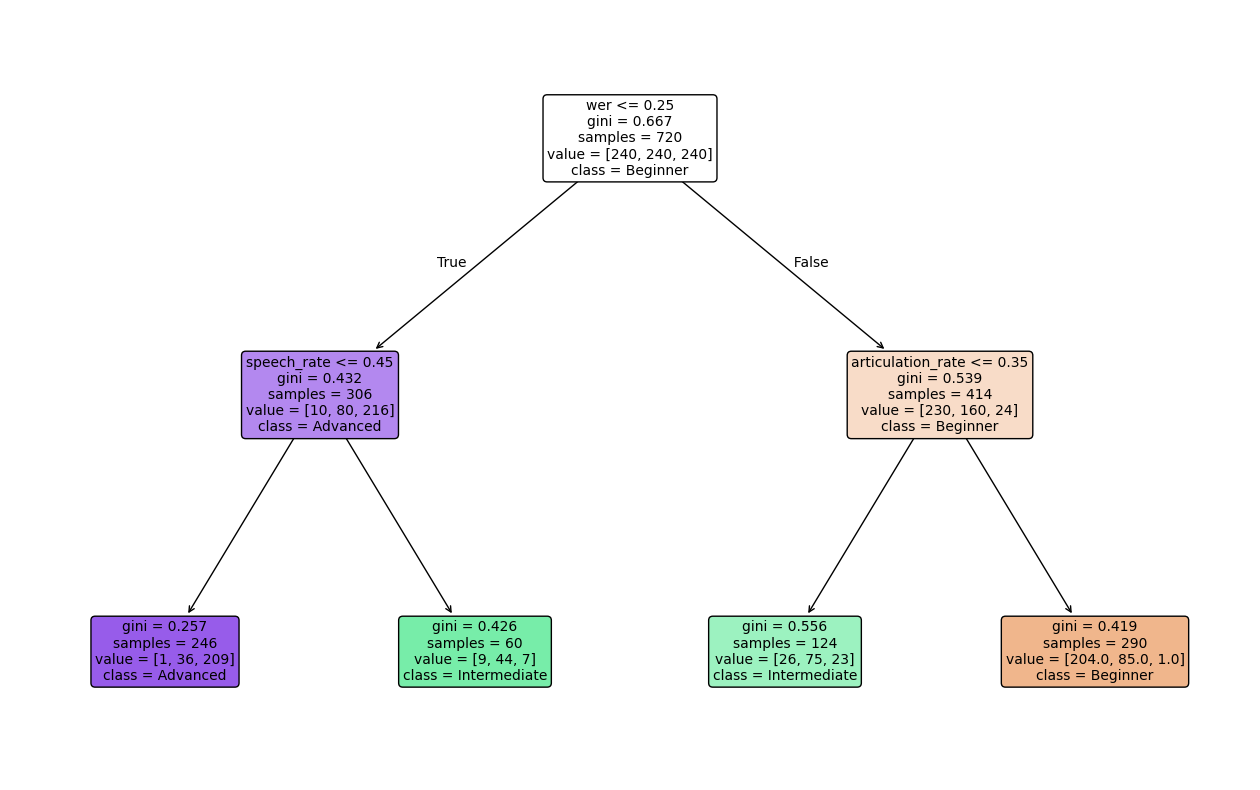

In [894]:
# Define mapping for your classes
label_map = {0: "Beginner", 1: "Intermediate", 2: "Advanced"}

plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[label_map[i] for i in clf.classes_],  # convert numeric classes to strings
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [895]:
# Save trained model to file
version = 3
with open(f"decision_tree_v{version}.pkl", "wb") as f:
    pickle.dump(clf, f)